In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.set_context("notebook")

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

In [8]:
def nor(X):
    if np.all((X >= 0)) or np.all((X < 0)):
        return 1
    else:
        return 0 

In [9]:
net_input = Input(shape=(2,))
percetron  = Dense(8, activation='tanh', name='p1')(net_input)
percetron2 = Dense(3, activation='tanh', name='p2')(percetron)
out        = Dense(1, activation='tanh')(percetron2) 
xor = Model(input=net_input, output=out)
xor.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
x_train = np.array([(np.random.random_sample(5000) - 0.5) * 2 for dim in range(2)]).transpose()
x_test  = np.array([(np.random.random_sample(100)  - 0.5) * 2 for dim in range(2)]).transpose()
y_train = np.apply_along_axis(nor, 1, x_train)
y_test  = np.apply_along_axis(nor, 1, x_test)

In [11]:
history = xor.fit(x_train, y_train,
                verbose=0,
                nb_epoch=2000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))

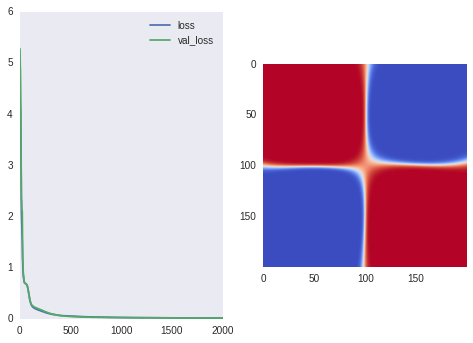

In [12]:
plt.subplot(121)
for key, data in history.history.items():
    plt.plot(data,label=key)
plt.legend(history.history.keys())

x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
xx, yy = np.meshgrid(x,y)
# xx
x1 = xx.reshape(-1,1)
x2 = yy.reshape(-1,1)
z = xor.predict(np.concatenate((x1,x2),axis=1))
z = z.reshape(len(x),len(y))
plt.subplot(122)
plt.imshow(z,cmap='coolwarm')


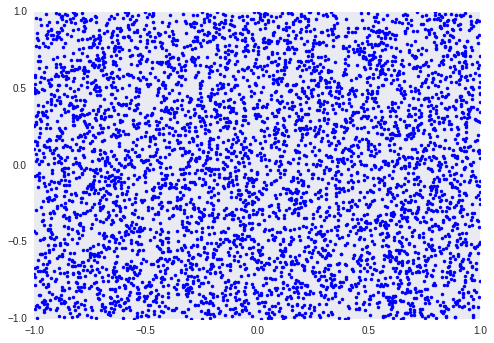

In [13]:
plt.plot(x_train[:, 0], x_train[:,1], '.b')

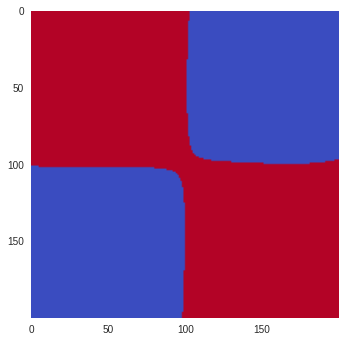

In [14]:

plt.imshow(z >= 0,cmap='coolwarm')

In [15]:
import pickle
with open('xor.keras', 'wb') as out:
    pickle.dump(xor,out)

In [16]:
with open('xor.keras' , 'rb') as kmodel:
    model = pickle.load(kmodel)

In [23]:
list(map(lambda w: len(w.shape),xor.get_weights()))

[2, 1, 2, 1, 2, 1]

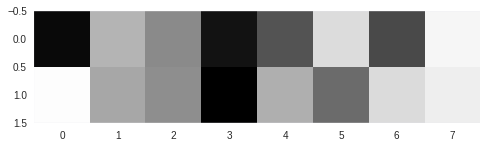

In [27]:
plt.imshow(model.get_weights()[0],interpolation='none')

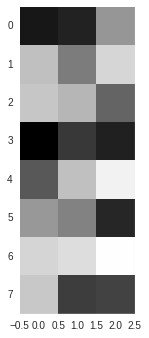

In [35]:
plt.imshow(model.get_weights()[2],interpolation='none')

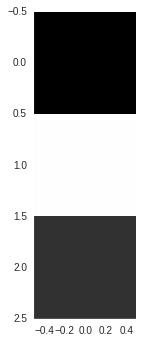

In [36]:
plt.imshow(model.get_weights()[4],interpolation='none')

In [32]:
line_data = np.array([[0,0],[10,0]],np.float32)

In [33]:
model.predict_generator()

(2, 2)